In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
%matplotlib inline

c:\python\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


# Demonetization_tweets

In [2]:
dm_df = pd.read_csv('demonetization_tweets.csv',encoding = 'ISO-8859-1')
dm_df.head()

,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,11/23/2016 18:40,False,NaN,8.014960e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,11/23/2016 18:40,False,NaN,8.014960e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,11/23/2016 18:40,False,NaN,8.014960e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False
3,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,11/23/2016 18:39,False,NaN,8.014960e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False
4,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,11/23/2016 18:39,False,NaN,8.014950e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False


In [3]:
demonitization_df = dm_df[['text']]
demonitization_df.head()

,text
0,RT @rssurjewala: Critical question: Was PayTM ...
1,RT @Hemant_80: Did you vote on #Demonetization...
2,"RT @roshankar: Former FinSec, RBI Dy Governor,..."
3,RT @ANI_news: Gurugram (Haryana): Post office ...
4,RT @satishacharya: Reddy Wedding! @mail_today ...


In [4]:
def clean_tweets(tweet):
    #Remove Html  
    tweet=BeautifulSoup(tweet).get_text()
    
    pattern = re.compile(r"(RT) @[^\s]+[\s]?|@[^\s]+[\s]?")

    tweet = re.sub(
           pattern, 
           "", tweet)
          
    
    #Remove Non-Letters
    tweet=re.sub('[^a-zA-Z]',' ',tweet)
    
    #Convert to lower_case and split
    tweet=tweet.lower().split()
    
    #Remove stopwords
    stop=set(stopwords.words('english'))
    stop.add('https')
    words=[w for w in tweet if not w in stop]
    
    #join the words back into one string
    return(' '.join(words))

In [5]:
demonitization_df['processedtext']=demonitization_df['text'].apply(lambda x:clean_tweets(x))


c:\python\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html5lib"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file c:\python\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "html5lib")

  markup_type=markup_type))
c:\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [6]:
demonitization_df.head()

,text,processedtext
0,RT @rssurjewala: Critical question: Was PayTM ...,critical question paytm informed demonetizatio...
1,RT @Hemant_80: Did you vote on #Demonetization...,vote demonetization modi survey app
2,"RT @roshankar: Former FinSec, RBI Dy Governor,...",former finsec rbi dy governor cbdt chair harva...
3,RT @ANI_news: Gurugram (Haryana): Post office ...,gurugram haryana post office employees provide...
4,RT @satishacharya: Reddy Wedding! @mail_today ...,reddy wedding cartoon demonetization reddywedd...


In [7]:
sid = SentimentIntensityAnalyzer()

demonitization_df['sentiment_compound_polarity']=demonitization_df.processedtext.apply(lambda x:sid.polarity_scores(x)['compound'])
demonitization_df['sentiment_neutral']=demonitization_df.processedtext.apply(lambda x:sid.polarity_scores(x)['neu'])
demonitization_df['sentiment_negative']=demonitization_df.processedtext.apply(lambda x:sid.polarity_scores(x)['neg'])
demonitization_df['sentiment_pos']=demonitization_df.processedtext.apply(lambda x:sid.polarity_scores(x)['pos'])
demonitization_df['sentiment_type']=''
demonitization_df.loc[demonitization_df.sentiment_compound_polarity>0,'sentiment_type']='POSITIVE'
demonitization_df.loc[demonitization_df.sentiment_compound_polarity==0,'sentiment_type']='NEUTRAL'
demonitization_df.loc[demonitization_df.sentiment_compound_polarity<0,'sentiment_type']='NEGATIVE'
demonitization_df.head()

c:\python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\python\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
c:\python\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

,text,processedtext,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_pos,sentiment_type
0,RT @rssurjewala: Critical question: Was PayTM ...,critical question paytm informed demonetizatio...,0.1027,0.667,0.153,0.18,POSITIVE
1,RT @Hemant_80: Did you vote on #Demonetization...,vote demonetization modi survey app,0.0000,1.000,0.000,0.00,NEUTRAL
2,"RT @roshankar: Former FinSec, RBI Dy Governor,...",former finsec rbi dy governor cbdt chair harva...,0.0000,1.000,0.000,0.00,NEUTRAL
3,RT @ANI_news: Gurugram (Haryana): Post office ...,gurugram haryana post office employees provide...,0.0000,1.000,0.000,0.00,NEUTRAL
4,RT @satishacharya: Reddy Wedding! @mail_today ...,reddy wedding cartoon demonetization reddywedd...,0.0000,1.000,0.000,0.00,NEUTRAL


In [8]:
demonitization_df['sentiment_type'].value_counts()

POSITIVE    3353
NEGATIVE    2326
NEUTRAL     2321
Name: sentiment_type, dtype: int64

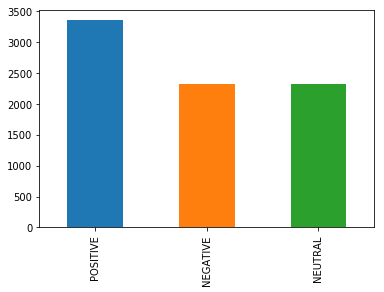

In [9]:
demonitization_df['sentiment_type'].value_counts().plot.bar()

In [10]:
processed_dmtweet_train, processed_dmtweet_test, sentimentdm_train, sentimentdm_test = train_test_split(demonitization_df['processedtext'], demonitization_df['sentiment_type'], test_size=0.2,random_state=101)

print(len(processed_dmtweet_train), len(processed_dmtweet_test), len(processed_dmtweet_train) + len(processed_dmtweet_test))

6400 1600 8000


In [11]:
vec = CountVectorizer(min_df=2  , ngram_range=(1,3)).fit(demonitization_df['processedtext'])

bag_of_words = vec.transform(demonitization_df['processedtext'])
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)[:10]
print(words_freq)

[('demonetization', 8280), ('co', 3379), ('demonetization co', 1516), ('pm', 1265), ('people', 892), ('modi', 837), ('lakh', 689), ('rs', 676), ('bank', 665), ('support', 648)]


In [12]:
count_vect = CountVectorizer(min_df=2 ,ngram_range=(1,3))
X_dm = count_vect.fit_transform(demonitization_df['processedtext'])
X_dmTrain_counts = count_vect.fit_transform(processed_dmtweet_train)

In [13]:
X_dmTest_counts = count_vect.transform(processed_dmtweet_test)

In [14]:
print('Train data-Shape of Sparse Matrix: ', X_dmTrain_counts.shape)
print('Train data-Amount of Non-Zero occurences: ', X_dmTrain_counts.nnz)

print('Test data-Shape of Sparse Matrix: ', X_dmTest_counts.shape)
print('Test data-Amount of Non-Zero occurences: ', X_dmTest_counts.nnz)

Train data-Shape of Sparse Matrix:  (6400, 11741)
Train data-Amount of Non-Zero occurences:  154899
Test data-Shape of Sparse Matrix:  (1600, 11741)
Test data-Amount of Non-Zero occurences:  36752


In [15]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_dm_tfidf = tfidf_transformer.fit_transform(X_dm)
X_dmTrain_tfidf = tfidf_transformer.fit_transform(X_dmTrain_counts)

In [16]:
X_dmTest_tfidf = tfidf_transformer.transform(X_dmTest_counts)

In [17]:
print(X_dmTrain_tfidf.shape)
print(X_dmTest_tfidf.shape)

(6400, 11741)
(1600, 11741)


In [18]:
demonetization_prediction={}

In [19]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model_dm = DecisionTreeClassifier(max_leaf_nodes=2, random_state=101)
decision_tree_model_dm.fit(X_dmTrain_tfidf,sentimentdm_train)
demonetization_prediction['Decision tree'] = decision_tree_model_dm.predict(X_dmTest_tfidf)
print("Demonetization-Decision Tree Accuracy : {}".format(decision_tree_model_dm.score(X_dmTest_tfidf , sentimentdm_test)))

Demonetization-Decision Tree Accuracy : 0.42375


In [20]:
from sklearn.linear_model import LogisticRegression
logistic_regression_model_dm = LogisticRegression( random_state=101)
logistic_regression_model_dm.fit(X_dmTrain_tfidf,sentimentdm_train)
demonetization_prediction['Logistic Regression'] = logistic_regression_model_dm.predict(X_dmTest_tfidf)
print("Demonetization-Logistic regression Accuracy : {}".format(logistic_regression_model_dm.score(X_dmTest_tfidf , sentimentdm_test)))

Demonetization-Logistic regression Accuracy : 0.901875


In [21]:
keys = demonetization_prediction.keys()
for key in keys:
    print(" {}:".format(key))
    print(metrics.classification_report(sentimentdm_test, demonetization_prediction.get(key), target_names = ["POSITIVE", "NEGATIVE","NEUTRAL"]))
    print("\n")

 Decision tree:
             precision    recall  f1-score   support

   POSITIVE       0.00      0.00      0.00       469
   NEGATIVE       0.00      0.00      0.00       453
    NEUTRAL       0.42      1.00      0.60       678

avg / total       0.18      0.42      0.25      1600



 Logistic Regression:
             precision    recall  f1-score   support

   POSITIVE       0.91      0.88      0.89       469
   NEGATIVE       0.91      0.87      0.89       453
    NEUTRAL       0.89      0.94      0.91       678

avg / total       0.90      0.90      0.90      1600





c:\python\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [22]:
decision_tree_model_dm1 = DecisionTreeClassifier(max_leaf_nodes=2, random_state=101)
decision_tree_model_dm1.fit(X_dm_tfidf,demonitization_df['sentiment_type'])
demonitization_df['Sentiment_byDT']=decision_tree_model_dm1.predict(X_dm_tfidf)
demonitization_df.head()

c:\python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,text,processedtext,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_pos,sentiment_type,Sentiment_byDT
0,RT @rssurjewala: Critical question: Was PayTM ...,critical question paytm informed demonetizatio...,0.1027,0.667,0.153,0.18,POSITIVE,POSITIVE
1,RT @Hemant_80: Did you vote on #Demonetization...,vote demonetization modi survey app,0.0000,1.000,0.000,0.00,NEUTRAL,POSITIVE
2,"RT @roshankar: Former FinSec, RBI Dy Governor,...",former finsec rbi dy governor cbdt chair harva...,0.0000,1.000,0.000,0.00,NEUTRAL,POSITIVE
3,RT @ANI_news: Gurugram (Haryana): Post office ...,gurugram haryana post office employees provide...,0.0000,1.000,0.000,0.00,NEUTRAL,POSITIVE
4,RT @satishacharya: Reddy Wedding! @mail_today ...,reddy wedding cartoon demonetization reddywedd...,0.0000,1.000,0.000,0.00,NEUTRAL,POSITIVE


In [23]:
logistic_regression_model_dm1 = LogisticRegression( random_state=101)
logistic_regression_model_dm1.fit(X_dm_tfidf,demonitization_df['sentiment_type'])
demonitization_df['Sentiment_byLR']=logistic_regression_model_dm1.predict(X_dm_tfidf)
demonitization_df.head()

c:\python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,text,processedtext,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_pos,sentiment_type,Sentiment_byDT,Sentiment_byLR
0,RT @rssurjewala: Critical question: Was PayTM ...,critical question paytm informed demonetizatio...,0.1027,0.667,0.153,0.18,POSITIVE,POSITIVE,POSITIVE
1,RT @Hemant_80: Did you vote on #Demonetization...,vote demonetization modi survey app,0.0000,1.000,0.000,0.00,NEUTRAL,POSITIVE,NEUTRAL
2,"RT @roshankar: Former FinSec, RBI Dy Governor,...",former finsec rbi dy governor cbdt chair harva...,0.0000,1.000,0.000,0.00,NEUTRAL,POSITIVE,NEUTRAL
3,RT @ANI_news: Gurugram (Haryana): Post office ...,gurugram haryana post office employees provide...,0.0000,1.000,0.000,0.00,NEUTRAL,POSITIVE,NEUTRAL
4,RT @satishacharya: Reddy Wedding! @mail_today ...,reddy wedding cartoon demonetization reddywedd...,0.0000,1.000,0.000,0.00,NEUTRAL,POSITIVE,NEUTRAL


In [24]:
demonitization_df.to_csv("Demonetization_predicted_result.csv",index=False)

# GST Tweets

In [25]:
gst_df = pd.read_csv('Gst_tweets.csv',encoding = 'ISO-8859-1')
gst_df.head()

,id_str,from_user,text,created_at,time,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,source,Unnamed: 12,user_followers_count,user_friends_count,user_location,status_url,entities_str
0,961674756071350278,vaandematram,RT @vaandematram: #GST à¤à¤¾ à¤µà¤¿à¤°à¥à¤§ ...,Thu Feb 08 18:55:03 +0000 2018,08/02/2018 18:55:03,NaN,en,NaN,NaN,781407854569881600,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,730.0,47.0,India,http://twitter.com/vaandematram/statuses/96167...,"{""hashtags"":[{""text"":""GST"",""indices"":[18,22]}]..."
1,961674645207441410,christendusse12,"RT @fadnavis_amruta: Glimpse of #GST song , I ...",Thu Feb 08 18:54:37 +0000 2018,08/02/2018 18:54:37,NaN,en,NaN,NaN,961032020880076801,NaN,"<a href=""http://twitter.com/download/android"" ...",NaN,2.0,47.0,NaN,http://twitter.com/christendusse12/statuses/96...,"{""hashtags"":[{""text"":""GST"",""indices"":[32,36]}]..."
2,961674539045412869,amaresh4,à¤¬à¤¿à¤²à¥à¤¡à¤°à¥à¤ à¤¨à¥ à¤®à¤¾à¤¨à¥ à...,Thu Feb 08 18:54:11 +0000 2018,08/02/2018 18:54:11,NaN,en,NaN,NaN,136207490,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,757.0,675.0,Delhi,http://twitter.com/amaresh4/statuses/961674539...,"{""hashtags"":[{""text"":""gst"",""indices"":[82,86]}]..."
3,961674417431629824,teruya_talitha,"RT @fadnavis_amruta: Glimpse of #GST song , I ...",Thu Feb 08 18:53:42 +0000 2018,08/02/2018 18:53:42,NaN,en,NaN,NaN,961208311721938944,NaN,"<a href=""http://twitter.com/download/android"" ...",NaN,1.0,49.0,NaN,http://twitter.com/teruya_talitha/statuses/961...,"{""hashtags"":[{""text"":""GST"",""indices"":[32,36]}]..."
4,961674250632364032,hntiaaobsisqr21,"RT @fadnavis_amruta: Glimpse of #GST song , I ...",Thu Feb 08 18:53:03 +0000 2018,08/02/2018 18:53:03,NaN,en,NaN,NaN,961361830311415809,NaN,"<a href=""http://twitter.com/download/android"" ...",NaN,1.0,77.0,"Egmore Nungambakkam, India",http://twitter.com/hntiaaobsisqr21/statuses/96...,"{""hashtags"":[{""text"":""GST"",""indices"":[32,36]}]..."


In [26]:
csgst_df = gst_df[['text']]
csgst_df.head()

,text
0,RT @vaandematram: #GST à¤à¤¾ à¤µà¤¿à¤°à¥à¤§ ...
1,"RT @fadnavis_amruta: Glimpse of #GST song , I ..."
2,à¤¬à¤¿à¤²à¥à¤¡à¤°à¥à¤ à¤¨à¥ à¤®à¤¾à¤¨à¥ à...
3,"RT @fadnavis_amruta: Glimpse of #GST song , I ..."
4,"RT @fadnavis_amruta: Glimpse of #GST song , I ..."


In [27]:
csgst_df['processedtext']=csgst_df['text'].apply(lambda x:clean_tweets(x))


c:\python\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html5lib"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file c:\python\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "html5lib")

  markup_type=markup_type))
c:\python\lib\site-packages\bs4\__init__.py:282: UserWarning: "https://t.co/X2J3aDT52c
#GST" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
c:\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopy

In [28]:
csgst_df.head()

,text,processedtext
0,RT @vaandematram: #GST à¤à¤¾ à¤µà¤¿à¤°à¥à¤§ ...,gst gstfornewindia
1,"RT @fadnavis_amruta: Glimpse of #GST song , I ...",glimpse gst song sang customs wth composed rit...
2,à¤¬à¤¿à¤²à¥à¤¡à¤°à¥à¤ à¤¨à¥ à¤®à¤¾à¤¨à¥ à...,co pkwmpj hdd gst
3,"RT @fadnavis_amruta: Glimpse of #GST song , I ...",glimpse gst song sang customs wth composed rit...
4,"RT @fadnavis_amruta: Glimpse of #GST song , I ...",glimpse gst song sang customs wth composed rit...


In [29]:
csgst_df['sentiment_compound_polarity']=csgst_df.processedtext.apply(lambda x:sid.polarity_scores(x)['compound'])
csgst_df['sentiment_neutral']=csgst_df.processedtext.apply(lambda x:sid.polarity_scores(x)['neu'])
csgst_df['sentiment_negative']=csgst_df.processedtext.apply(lambda x:sid.polarity_scores(x)['neg'])
csgst_df['sentiment_pos']=csgst_df.processedtext.apply(lambda x:sid.polarity_scores(x)['pos'])
csgst_df['sentiment_type']=''
csgst_df.loc[csgst_df.sentiment_compound_polarity>0,'sentiment_type']='POSITIVE'
csgst_df.loc[csgst_df.sentiment_compound_polarity==0,'sentiment_type']='NEUTRAL'
csgst_df.loc[csgst_df.sentiment_compound_polarity<0,'sentiment_type']='NEGATIVE'
csgst_df.head()

c:\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#i

,text,processedtext,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_pos,sentiment_type
0,RT @vaandematram: #GST à¤à¤¾ à¤µà¤¿à¤°à¥à¤§ ...,gst gstfornewindia,0.0000,1.000,0.000,0.0,NEUTRAL
1,"RT @fadnavis_amruta: Glimpse of #GST song , I ...",glimpse gst song sang customs wth composed rit...,-0.5267,0.892,0.108,0.0,NEGATIVE
2,à¤¬à¤¿à¤²à¥à¤¡à¤°à¥à¤ à¤¨à¥ à¤®à¤¾à¤¨à¥ à...,co pkwmpj hdd gst,0.0000,1.000,0.000,0.0,NEUTRAL
3,"RT @fadnavis_amruta: Glimpse of #GST song , I ...",glimpse gst song sang customs wth composed rit...,-0.5267,0.892,0.108,0.0,NEGATIVE
4,"RT @fadnavis_amruta: Glimpse of #GST song , I ...",glimpse gst song sang customs wth composed rit...,-0.5267,0.892,0.108,0.0,NEGATIVE


In [30]:
csgst_df['sentiment_type'].value_counts()

NEUTRAL     5657
POSITIVE    2450
NEGATIVE    1712
Name: sentiment_type, dtype: int64

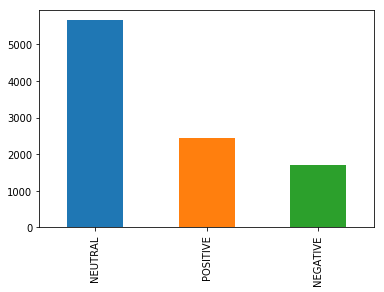

In [31]:
csgst_df['sentiment_type'].value_counts().plot.bar()

In [32]:
processed_csgsttweet_train, processed_csgsttweet_test, sentimentcsgst_train, sentimentcsgst_test = train_test_split(csgst_df['processedtext'], csgst_df['sentiment_type'], test_size=0.2,random_state=101)

print(len(processed_csgsttweet_train), len(processed_csgsttweet_test), len(processed_csgsttweet_train) + len(processed_csgsttweet_test))

7855 1964 9819


In [33]:
vec1 = CountVectorizer(min_df=2  , ngram_range=(1,3)).fit(csgst_df['processedtext'])

bag_of_words1 = vec1.transform(csgst_df['processedtext'])
sum_words1 = bag_of_words1.sum(axis=0)
words_freq1 = [(word1, sum_words1[0, idx1]) for word1, idx1 in vec1.vocabulary_.items()]
words_freq1 =sorted(words_freq1, key = lambda x: x[1], reverse=True)[:10]
print(words_freq1)

[('gst', 12969), ('co', 6973), ('gst co', 2197), ('gst gst', 2083), ('budget', 1295), ('gst gst gst', 937), ('gst gst co', 900), ('tax', 826), ('modi', 760), ('uxchmunmex', 731)]


In [34]:
count_vect1 = CountVectorizer(min_df=2 ,ngram_range=(1,3))
X_csgst = count_vect1.fit_transform(csgst_df['processedtext'])
X_csgstTrain_counts = count_vect1.fit_transform(processed_csgsttweet_train)

In [35]:
X_csgstTest_counts = count_vect1.transform(processed_csgsttweet_test)

In [37]:
print('Train data-Shape of Sparse Matrix: ', X_csgstTrain_counts.shape)
print('Train data-Amount of Non-Zero occurences: ', X_csgstTrain_counts.nnz)

print('Test data-Shape of Sparse Matrix: ', X_csgstTest_counts.shape)
print('Test data-Amount of Non-Zero occurences: ', X_csgstTest_counts.nnz)

Train data-Shape of Sparse Matrix:  (7855, 20759)
Train data-Amount of Non-Zero occurences:  201970
Test data-Shape of Sparse Matrix:  (1964, 20759)
Test data-Amount of Non-Zero occurences:  47824


In [38]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer1 = TfidfTransformer()
X_csgst_tfidf = tfidf_transformer1.fit_transform(X_csgst)
X_csgstTrain_tfidf = tfidf_transformer1.fit_transform(X_csgstTrain_counts)

In [39]:
X_csgstTest_tfidf = tfidf_transformer1.transform(X_csgstTest_counts)

In [40]:
print(X_csgstTrain_tfidf.shape)
print(X_csgstTest_tfidf.shape)

(7855, 20759)
(1964, 20759)


In [41]:
gst_prediction={}

In [42]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model_csgst = DecisionTreeClassifier(max_leaf_nodes=2, random_state=101)
decision_tree_model_csgst.fit(X_csgstTrain_tfidf,sentimentcsgst_train)
gst_prediction['Decision tree'] = decision_tree_model_csgst.predict(X_csgstTest_tfidf)
print("GST-Decision Tree Accuracy : {}".format(decision_tree_model_csgst.score(X_csgstTest_tfidf , sentimentcsgst_test)))

GST-Decision Tree Accuracy : 0.5936863543788188


In [43]:
from sklearn.linear_model import LogisticRegression
logistic_regression_model_csgst = LogisticRegression( random_state=101)
logistic_regression_model_csgst.fit(X_csgstTrain_tfidf,sentimentcsgst_train)
gst_prediction['Logistic Regression'] = logistic_regression_model_csgst.predict(X_csgstTest_tfidf)
print("GST-Logistic regression Accuracy : {}".format(logistic_regression_model_csgst.score(X_csgstTest_tfidf , sentimentcsgst_test)))

GST-Logistic regression Accuracy : 0.905295315682281


In [44]:
keys = gst_prediction.keys()
for key in keys:
    print(" {}:".format(key))
    print(metrics.classification_report(sentimentcsgst_test, gst_prediction.get(key), target_names = ["POSITIVE", "NEGATIVE","NEUTRAL"]))
    print("\n")

 Decision tree:
             precision    recall  f1-score   support

   POSITIVE       0.00      0.00      0.00       335
   NEGATIVE       0.91      0.63      0.75      1128
    NEUTRAL       0.38      0.90      0.54       501

avg / total       0.62      0.59      0.57      1964



 Logistic Regression:
             precision    recall  f1-score   support

   POSITIVE       0.96      0.73      0.83       335
   NEGATIVE       0.91      0.97      0.94      1128
    NEUTRAL       0.86      0.87      0.87       501

avg / total       0.91      0.91      0.90      1964





c:\python\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [45]:
decision_tree_model_csgst1 = DecisionTreeClassifier(max_leaf_nodes=2, random_state=101)
decision_tree_model_csgst1.fit(X_csgst_tfidf,csgst_df['sentiment_type'])
csgst_df['Sentiment_byDT']=decision_tree_model_csgst1.predict(X_csgst_tfidf)
csgst_df.head()

c:\python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,text,processedtext,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_pos,sentiment_type,Sentiment_byDT
0,RT @vaandematram: #GST à¤à¤¾ à¤µà¤¿à¤°à¥à¤§ ...,gst gstfornewindia,0.0000,1.000,0.000,0.0,NEUTRAL,NEUTRAL
1,"RT @fadnavis_amruta: Glimpse of #GST song , I ...",glimpse gst song sang customs wth composed rit...,-0.5267,0.892,0.108,0.0,NEGATIVE,POSITIVE
2,à¤¬à¤¿à¤²à¥à¤¡à¤°à¥à¤ à¤¨à¥ à¤®à¤¾à¤¨à¥ à...,co pkwmpj hdd gst,0.0000,1.000,0.000,0.0,NEUTRAL,NEUTRAL
3,"RT @fadnavis_amruta: Glimpse of #GST song , I ...",glimpse gst song sang customs wth composed rit...,-0.5267,0.892,0.108,0.0,NEGATIVE,POSITIVE
4,"RT @fadnavis_amruta: Glimpse of #GST song , I ...",glimpse gst song sang customs wth composed rit...,-0.5267,0.892,0.108,0.0,NEGATIVE,POSITIVE


In [46]:
logistic_regression_model_csgst1 = LogisticRegression( random_state=101)
logistic_regression_model_csgst1.fit(X_csgst_tfidf,csgst_df['sentiment_type'])
csgst_df['Sentiment_byLR']=logistic_regression_model_csgst1.predict(X_csgst_tfidf)
csgst_df.head()

c:\python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,text,processedtext,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_pos,sentiment_type,Sentiment_byDT,Sentiment_byLR
0,RT @vaandematram: #GST à¤à¤¾ à¤µà¤¿à¤°à¥à¤§ ...,gst gstfornewindia,0.0000,1.000,0.000,0.0,NEUTRAL,NEUTRAL,NEUTRAL
1,"RT @fadnavis_amruta: Glimpse of #GST song , I ...",glimpse gst song sang customs wth composed rit...,-0.5267,0.892,0.108,0.0,NEGATIVE,POSITIVE,NEGATIVE
2,à¤¬à¤¿à¤²à¥à¤¡à¤°à¥à¤ à¤¨à¥ à¤®à¤¾à¤¨à¥ à...,co pkwmpj hdd gst,0.0000,1.000,0.000,0.0,NEUTRAL,NEUTRAL,NEUTRAL
3,"RT @fadnavis_amruta: Glimpse of #GST song , I ...",glimpse gst song sang customs wth composed rit...,-0.5267,0.892,0.108,0.0,NEGATIVE,POSITIVE,NEGATIVE
4,"RT @fadnavis_amruta: Glimpse of #GST song , I ...",glimpse gst song sang customs wth composed rit...,-0.5267,0.892,0.108,0.0,NEGATIVE,POSITIVE,NEGATIVE


In [47]:
csgst_df.to_csv("GST_predicted_result.csv",index=False)

# Clean India Tweets

In [48]:
cleanInd_df = pd.read_csv('Clean_India.csv',encoding = 'ISO-8859-1')
cleanInd_df.head()

,id_str,from_user,text,created_at,time,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,source,profile_image_url,user_followers_count,user_friends_count,user_location,status_url,entities_str
0,961887187498184705,gbumanath,RT @chennaistpi: Cleanliness drive at STPI-Mad...,Fri Feb 09 08:59:11 +0000 2018,09/02/2018 08:59:11,NaN,en,NaN,NaN,727053648568537088,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://pbs.twimg.com/profile_images/7270555065...,67.0,47.0,Nanganallur India,http://twitter.com/gbumanath/statuses/96188718...,"{""hashtags"":[{""text"":""SwachhtaPakhwada"",""indic..."
1,961887178732302336,yogeshwar_ade,RT @STPIPune: Distribution of pamphlets at STP...,Fri Feb 09 08:59:09 +0000 2018,09/02/2018 08:59:09,NaN,en,NaN,NaN,815808866625540097,NaN,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/8321920263...,68.0,41.0,"Pune, India",http://twitter.com/yogeshwar_ade/statuses/9618...,"{""hashtags"":[{""text"":""SwachhataPakhwada"",""indi..."
2,961887162869231616,gbumanath,RT @chennaistpi: Cleanliness drive at RMG Elec...,Fri Feb 09 08:59:05 +0000 2018,09/02/2018 08:59:05,NaN,en,NaN,NaN,727053648568537088,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://pbs.twimg.com/profile_images/7270555065...,67.0,47.0,Nanganallur India,http://twitter.com/gbumanath/statuses/96188716...,"{""hashtags"":[{""text"":""SwachhtaPakhwada"",""indic..."
3,961887058460426240,gbumanath,RT @chennaistpi: Staff at STPI-Puducherry invo...,Fri Feb 09 08:58:40 +0000 2018,09/02/2018 08:58:40,NaN,en,NaN,NaN,727053648568537088,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://pbs.twimg.com/profile_images/7270555065...,67.0,47.0,Nanganallur India,http://twitter.com/gbumanath/statuses/96188705...,"{""hashtags"":[{""text"":""SwachhtaPakhwada"",""indic..."
4,961886889753042949,gbumanath,RT @chennaistpi: Staff at STPI-Coimbatore invo...,Fri Feb 09 08:58:00 +0000 2018,09/02/2018 08:58:00,NaN,en,NaN,NaN,727053648568537088,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",http://pbs.twimg.com/profile_images/7270555065...,67.0,47.0,Nanganallur India,http://twitter.com/gbumanath/statuses/96188688...,"{""hashtags"":[{""text"":""SwachhtaPakhwada"",""indic..."


In [49]:
cleanIndia_df = cleanInd_df[['text']]
cleanIndia_df.head()

,text
0,RT @chennaistpi: Cleanliness drive at STPI-Mad...
1,RT @STPIPune: Distribution of pamphlets at STP...
2,RT @chennaistpi: Cleanliness drive at RMG Elec...
3,RT @chennaistpi: Staff at STPI-Puducherry invo...
4,RT @chennaistpi: Staff at STPI-Coimbatore invo...


In [50]:
cleanIndia_df['processedtext']=cleanIndia_df['text'].apply(lambda x:clean_tweets(x))

c:\python\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html5lib"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file c:\python\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "html5lib")

  markup_type=markup_type))
c:\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [51]:
cleanIndia_df.head()

,text,processedtext
0,RT @chennaistpi: Cleanliness drive at STPI-Mad...,cleanliness drive stpi madurai premises swachh...
1,RT @STPIPune: Distribution of pamphlets at STP...,distribution pamphlets stpi nashik visitors pa...
2,RT @chennaistpi: Cleanliness drive at RMG Elec...,cleanliness drive rmg electrical area stpi che...
3,RT @chennaistpi: Staff at STPI-Puducherry invo...,staff stpi puducherry involved cleanliness dri...
4,RT @chennaistpi: Staff at STPI-Coimbatore invo...,staff stpi coimbatore involved cleanliness dri...


In [52]:
cleanIndia_df['sentiment_compound_polarity']=cleanIndia_df.processedtext.apply(lambda x:sid.polarity_scores(x)['compound'])
cleanIndia_df['sentiment_neutral']=cleanIndia_df.processedtext.apply(lambda x:sid.polarity_scores(x)['neu'])
cleanIndia_df['sentiment_negative']=cleanIndia_df.processedtext.apply(lambda x:sid.polarity_scores(x)['neg'])
cleanIndia_df['sentiment_pos']=cleanIndia_df.processedtext.apply(lambda x:sid.polarity_scores(x)['pos'])
cleanIndia_df['sentiment_type']=''
cleanIndia_df.loc[cleanIndia_df.sentiment_compound_polarity>0,'sentiment_type']='POSITIVE'
cleanIndia_df.loc[cleanIndia_df.sentiment_compound_polarity==0,'sentiment_type']='NEUTRAL'
cleanIndia_df.loc[cleanIndia_df.sentiment_compound_polarity<0,'sentiment_type']='NEGATIVE'
cleanIndia_df.head()

c:\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#i

,text,processedtext,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_pos,sentiment_type
0,RT @chennaistpi: Cleanliness drive at STPI-Mad...,cleanliness drive stpi madurai premises swachh...,0.0,1.0,0.0,0.0,NEUTRAL
1,RT @STPIPune: Distribution of pamphlets at STP...,distribution pamphlets stpi nashik visitors pa...,0.0,1.0,0.0,0.0,NEUTRAL
2,RT @chennaistpi: Cleanliness drive at RMG Elec...,cleanliness drive rmg electrical area stpi che...,0.0,1.0,0.0,0.0,NEUTRAL
3,RT @chennaistpi: Staff at STPI-Puducherry invo...,staff stpi puducherry involved cleanliness dri...,0.0,1.0,0.0,0.0,NEUTRAL
4,RT @chennaistpi: Staff at STPI-Coimbatore invo...,staff stpi coimbatore involved cleanliness dri...,0.0,1.0,0.0,0.0,NEUTRAL


In [53]:
cleanIndia_df['sentiment_type'].value_counts()

NEUTRAL     7722
POSITIVE    4303
NEGATIVE    1853
Name: sentiment_type, dtype: int64

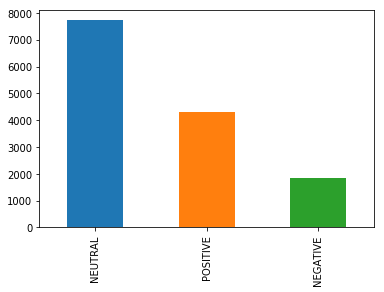

In [54]:
cleanIndia_df['sentiment_type'].value_counts().plot.bar()

In [55]:
processed_cleanIndiatweet_train, processed_cleanIndiatweet_test, sentimentcleanIndia_train, sentimentcleanIndia_test = train_test_split(cleanIndia_df['processedtext'], cleanIndia_df['sentiment_type'], test_size=0.2,random_state=101)

print(len(processed_cleanIndiatweet_train), len(processed_cleanIndiatweet_test), len(processed_cleanIndiatweet_train) + len(processed_cleanIndiatweet_test))

11102 2776 13878


In [57]:
vec2 = CountVectorizer(min_df=2  , ngram_range=(1,3)).fit(cleanIndia_df['processedtext'])

bag_of_words2 = vec2.transform(cleanIndia_df['processedtext'])
sum_words2 = bag_of_words2.sum(axis=0)
words_freq2 = [(word2, sum_words2[0, idx2]) for word2, idx2 in vec2.vocabulary_.items()]
words_freq2 =sorted(words_freq2, key = lambda x: x[1], reverse=True)[:10]
print(words_freq2)

[('co', 13826), ('swachhbharat', 10896), ('mycleanindia', 4814), ('swachhbharat co', 4129), ('zsbp', 3383), ('swachhtapakhwada', 2662), ('stpi', 2535), ('swachhbharatmission', 2436), ('cleanliness', 2169), ('drive', 1859)]


In [58]:
count_vect2 = CountVectorizer(min_df=2 ,ngram_range=(1,3))
X_cleanIndia = count_vect2.fit_transform(cleanIndia_df['processedtext'])
X_cleanIndiaTrain_counts = count_vect2.fit_transform(processed_cleanIndiatweet_train)

In [59]:
X_cleanIndiaTest_counts = count_vect2.transform(processed_cleanIndiatweet_test)

In [60]:
print('Train data-Shape of Sparse Matrix: ', X_cleanIndiaTrain_counts.shape)
print('Train data-Amount of Non-Zero occurences: ', X_cleanIndiaTrain_counts.nnz)

print('Test data-Shape of Sparse Matrix: ', X_cleanIndiaTest_counts.shape)
print('Test data-Amount of Non-Zero occurences: ', X_cleanIndiaTest_counts.nnz)

Train data-Shape of Sparse Matrix:  (11102, 27428)
Train data-Amount of Non-Zero occurences:  345825
Test data-Shape of Sparse Matrix:  (2776, 27428)
Test data-Amount of Non-Zero occurences:  81134


In [61]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer2 = TfidfTransformer()
X_cleanIndia_tfidf = tfidf_transformer2.fit_transform(X_cleanIndia)
X_cleanIndiaTrain_tfidf = tfidf_transformer2.fit_transform(X_cleanIndiaTrain_counts)

In [62]:
X_cleanIndiaTest_tfidf = tfidf_transformer2.transform(X_cleanIndiaTest_counts)

In [63]:
print(X_cleanIndiaTrain_tfidf.shape)
print(X_cleanIndiaTest_tfidf.shape)

(11102, 27428)
(2776, 27428)


In [64]:
cleanIndia_prediction={}

In [65]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model_cleanIndia = DecisionTreeClassifier(max_leaf_nodes=2, random_state=101)
decision_tree_model_cleanIndia.fit(X_cleanIndiaTrain_tfidf,sentimentcleanIndia_train)
cleanIndia_prediction['Decision tree'] = decision_tree_model_cleanIndia.predict(X_cleanIndiaTest_tfidf)
print("Clean India - Decision Tree Accuracy : {}".format(decision_tree_model_cleanIndia.score(X_cleanIndiaTest_tfidf , sentimentcleanIndia_test)))

Clean India - Decision Tree Accuracy : 0.603386167146974


In [66]:
from sklearn.linear_model import LogisticRegression
logistic_regression_model_cleanIndia = LogisticRegression( random_state=101)
logistic_regression_model_cleanIndia.fit(X_cleanIndiaTrain_tfidf,sentimentcleanIndia_train)
cleanIndia_prediction['Logistic Regression'] = logistic_regression_model_cleanIndia.predict(X_cleanIndiaTest_tfidf)
print("Clean India - Logistic regression Accuracy : {}".format(logistic_regression_model_cleanIndia.score(X_cleanIndiaTest_tfidf , sentimentcleanIndia_test)))

Clean India - Logistic regression Accuracy : 0.9438040345821326


In [67]:
keys = cleanIndia_prediction.keys()
for key in keys:
    print(" {}:".format(key))
    print(metrics.classification_report(sentimentcleanIndia_test, cleanIndia_prediction.get(key), target_names = ["POSITIVE", "NEGATIVE","NEUTRAL"]))
    print("\n")

 Decision tree:
             precision    recall  f1-score   support

   POSITIVE       0.00      0.00      0.00       360
   NEGATIVE       0.75      0.66      0.70      1560
    NEUTRAL       0.46      0.75      0.57       856

avg / total       0.56      0.60      0.57      2776



 Logistic Regression:
             precision    recall  f1-score   support

   POSITIVE       0.96      0.87      0.91       360
   NEGATIVE       0.94      0.99      0.96      1560
    NEUTRAL       0.95      0.90      0.92       856

avg / total       0.94      0.94      0.94      2776





c:\python\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [68]:
decision_tree_model_cleanIndia1 = DecisionTreeClassifier(max_leaf_nodes=2, random_state=101)
decision_tree_model_cleanIndia1.fit(X_cleanIndia_tfidf,cleanIndia_df['sentiment_type'])
cleanIndia_df['Sentiment_byDT']=decision_tree_model_cleanIndia1.predict(X_cleanIndia_tfidf)
cleanIndia_df.head()

c:\python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,text,processedtext,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_pos,sentiment_type,Sentiment_byDT
0,RT @chennaistpi: Cleanliness drive at STPI-Mad...,cleanliness drive stpi madurai premises swachh...,0.0,1.0,0.0,0.0,NEUTRAL,NEUTRAL
1,RT @STPIPune: Distribution of pamphlets at STP...,distribution pamphlets stpi nashik visitors pa...,0.0,1.0,0.0,0.0,NEUTRAL,POSITIVE
2,RT @chennaistpi: Cleanliness drive at RMG Elec...,cleanliness drive rmg electrical area stpi che...,0.0,1.0,0.0,0.0,NEUTRAL,POSITIVE
3,RT @chennaistpi: Staff at STPI-Puducherry invo...,staff stpi puducherry involved cleanliness dri...,0.0,1.0,0.0,0.0,NEUTRAL,NEUTRAL
4,RT @chennaistpi: Staff at STPI-Coimbatore invo...,staff stpi coimbatore involved cleanliness dri...,0.0,1.0,0.0,0.0,NEUTRAL,POSITIVE


In [69]:
logistic_regression_model_cleanIndia1 = LogisticRegression( random_state=101)
logistic_regression_model_cleanIndia1.fit(X_cleanIndia_tfidf,cleanIndia_df['sentiment_type'])
cleanIndia_df['Sentiment_byLR']=logistic_regression_model_cleanIndia1.predict(X_cleanIndia_tfidf)
cleanIndia_df.head()

c:\python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,text,processedtext,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_pos,sentiment_type,Sentiment_byDT,Sentiment_byLR
0,RT @chennaistpi: Cleanliness drive at STPI-Mad...,cleanliness drive stpi madurai premises swachh...,0.0,1.0,0.0,0.0,NEUTRAL,NEUTRAL,NEUTRAL
1,RT @STPIPune: Distribution of pamphlets at STP...,distribution pamphlets stpi nashik visitors pa...,0.0,1.0,0.0,0.0,NEUTRAL,POSITIVE,NEUTRAL
2,RT @chennaistpi: Cleanliness drive at RMG Elec...,cleanliness drive rmg electrical area stpi che...,0.0,1.0,0.0,0.0,NEUTRAL,POSITIVE,NEUTRAL
3,RT @chennaistpi: Staff at STPI-Puducherry invo...,staff stpi puducherry involved cleanliness dri...,0.0,1.0,0.0,0.0,NEUTRAL,NEUTRAL,NEUTRAL
4,RT @chennaistpi: Staff at STPI-Coimbatore invo...,staff stpi coimbatore involved cleanliness dri...,0.0,1.0,0.0,0.0,NEUTRAL,POSITIVE,NEUTRAL


In [70]:
cleanIndia_df.to_csv("CleanIndia_predicted_result.csv",index=False)